<a href="https://colab.research.google.com/github/atortosalopez/practica-1-aapl/blob/main/practica2_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2 Parte I. Clustering con sklearn

Para la primera parte obligatoria de esta práctica vamos a utilizar la librería [sklearn](http://scikit-learn.org/stable/) para trabajar con distintos algoritmos de clustering. La librería sklearn es una librería de Python que proporciona una gran cantidad de algoritmos de aprendizaje automático.

En este notebook debes ir leyendo las explicaciones, ejecutando el código que se te proporciona, y respondiendo a los ejercicios planteados. Debes incluir tus respuestas en el informe de prácticas.

Recuerda que para que los cambios se vayan guardando en tu repositorio de GitHub tienes que utilizar la opción *Save a Copy in GitHub...* del menú *File*.

Para nuestras pruebas con la libreria sklearn usaremos el fichero iris.csv. Este dataset es uno de los más utilizados en aprendizaje automático. Se trata de
una lista con 150 vectores de datos, cada uno de ellos con cuatro medidas numéricas sobre longitud y anchura de sépalo y pétalo de la flor de la
planta iris. Cada vector tiene asignado una de las tres posibles clasificaciones:
setosa, versiclor o virgínica. Puedes encontrar información sobre dicho dataset en  https://archive.ics.uci.edu/ml/datasets/Iris.

Comenzamos descargando el dataset.

In [ ]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv -O iris.csv

--2025-01-07 13:51:41--  https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4606 (4.5K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.50K  --.-KB/s    in 0s      

2025-01-07 13:51:41 (44.9 MB/s) - ‘iris.csv’ saved [4606/4606]



Para cargar este dataset vamos a utilizar la librería pandas.

In [ ]:
import pandas as pd

Utilizando el siguiente comando cargamos los datos a partir del fichero iris.csv y los almacenamos en la variable df.

In [ ]:
df = pd.read_csv('iris.csv')

***
**Pregunta**
Muestra las 8 primeras filas que se obtienen al evaluar df. Para ello escribe el comando a ejecutar en la siguiente celda (podemos utilizar la sintaxis de slices para obtener filas de un DataFrame).

In [ ]:
df.head(8)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


***

Para los algoritmos de clustering, la ultima columna de df no es necesaria ya que no vamos a utilizar la clase. Para eliminar esta columna usaremos el siguiente comando.

In [ ]:
df_noclass = df.iloc[:,:-1]

df es un DataFrame, pero nosotros estamos interesados en almacenar los valores del dataset como una lista de listas que es el formato esperado por la libreria sklearn. Para hacer esta conversion usamos el siguiente comando.

In [ ]:
irisValues = df_noclass.values

## K-means

Veámos como utilizar el algoritmo de [K-means de la librería sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans). Lo primero es cargar dicha funcionalidad. Todos los algoritmos de clustering disponibles en la librería sklearn se encuentran en el módulo [sklearn.cluster](https://scikit-learn.org/stable/modules/clustering.html). Además todos los algoritmos heredan de [BaseEstimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), lo que nos permitirá intercambiar los algoritmos de manera sencilla.

In [ ]:
from sklearn.cluster import KMeans

A continuación creamos un estimador usando dicha funcionalidad e indicándole el número de clusters a utilizar. Daros cuenta de que en el siguiente comando no indicamos el dataset, sino que simplemente iniciamos el algoritmo K-means, esto construye un objeto de la clase KMeans. Veremos que esta manera es la habitual para los algoritmos de clustering, y esto nos permitirá cambiar de algoritmo de manera sencilla.

In [ ]:
estimatorKmeans = KMeans(n_clusters=3)

***
**Pregunta**
Busca en la documentación qué otros parámetros se le puede pasar al constructor de la clase KMeans además del número de clusters. Responde en la siguiente celda, para ello haz doble click sobre la palabra Respuesta y edita la celda.

**Respuesta**

***

A continuación vamos a calcular los clusters. Para ello utilizamos el método fit de la clase KMeans.

In [ ]:
estimatorKmeans.fit(irisValues)

KMeans(n_clusters=3)

Como se puede observar el comando anterior nos devuelve la instancia de la clase KMeans, para acceder a dicha información tenemos que usar el atributo labels_ de la clase KMeans.

In [ ]:
estimatorKmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

***
**Pregunta**

Ejecuta uno o varios comandos para averiguar a qué cluster se han asignado las instancias 5, 37 y 90 del dataset.

In [ ]:
# Verificar los clusters asignados a las instancias 5, 37 y 90
clusters = [estimatorKmeans.labels_[4],  # Instancia 5 (índice 4)
            estimatorKmeans.labels_[36], # Instancia 37 (índice 36)
            estimatorKmeans.labels_[89]] # Instancia 90 (índice 89)]

print(f"Cluster de la instancia 5: {clusters[0]}")
print(f"Cluster de la instancia 37: {clusters[1]}")
print(f"Cluster de la instancia 90: {clusters[2]}")


NameError: name 'estimatorKmeans' is not defined

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Cargar el dataset
iris = load_iris()
data = iris.data

# Crear y entrenar el modelo
estimatorKmeans = KMeans(n_clusters=3, random_state=42)
estimatorKmeans.fit(data)

# Verificar los clusters asignados a las instancias 5, 37 y 90
clusters = [estimatorKmeans.labels_[4],  # Instancia 5 (índice 4)
            estimatorKmeans.labels_[36], # Instancia 37 (índice 36)
            estimatorKmeans.labels_[89]] # Instancia 90 (índice 89)]

print(f"Cluster de la instancia 5: {clusters[0]}")
print(f"Cluster de la instancia 37: {clusters[1]}")
print(f"Cluster de la instancia 90: {clusters[2]}")


Cluster de la instancia 5: 1
Cluster de la instancia 37: 1
Cluster de la instancia 90: 2


***

Otro de los atributos útiles que nos proporciona la clase KMeans es inertia_ que nos devuelve el valor de la función de coste.

***
**Pregunta**

¿Qué valor tiene la función de coste en nuestro caso?

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Cargar los datos
iris = load_iris()
data = iris.data

# Crear y entrenar el modelo
estimatorKmeans = KMeans(n_clusters=3, random_state=42)
estimatorKmeans.fit(data)

# Obtener el valor de la función de coste
print(f"El valor de la función de coste (inercia) es: {estimatorKmeans.inertia_}")


El valor de la función de coste (inercia) es: 78.85566582597727


***

El siguiente código permite generar una imagen con el análisis de siluetas para distintos valores de k, de este modo podemos elegir el valor de k basándonos en este método.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
%matplotlib inline

def dibuja_siluetas(maxClusters,data):
    for n_clusters in range(2,maxClusters):
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
      cluster_labels = clusterer.fit_predict(data)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(data, cluster_labels)
      print(
          "For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg,
      )

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(data, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(
              np.arange(y_lower, y_upper),
              0,
              ith_cluster_silhouette_values,
              facecolor=color,
              edgecolor=color,
              alpha=0.7,
          )

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(
          data[:, 0], data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
      )

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(
          centers[:, 0],
          centers[:, 1],
          marker="o",
          c="white",
          alpha=1,
          s=200,
          edgecolor="k",
      )

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(
          "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
          % n_clusters,
          fontsize=14,
          fontweight="bold",
      )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6808136202936816
For n_clusters = 3 The average silhouette_score is : 0.5509643746707443
For n_clusters = 4 The average silhouette_score is : 0.49511999553021513
For n_clusters = 5 The average silhouette_score is : 0.48966691107991667
For n_clusters = 6 The average silhouette_score is : 0.47482851351491223
For n_clusters = 7 The average silhouette_score is : 0.35028943178433114
For n_clusters = 8 The average silhouette_score is : 0.32367211728648404
For n_clusters = 9 The average silhouette_score is : 0.3152168474240839
For n_clusters = 10 The average silhouette_score is : 0.31874533278098727
For n_clusters = 11 The average silhouette_score is : 0.31593625518283347
For n_clusters = 12 The average silhouette_score is : 0.30948777388873416
For n_clusters = 13 The average silhouette_score is : 0.31560589550280904
For n_clusters = 14 The average silhouette_score is : 0.3300018489141665


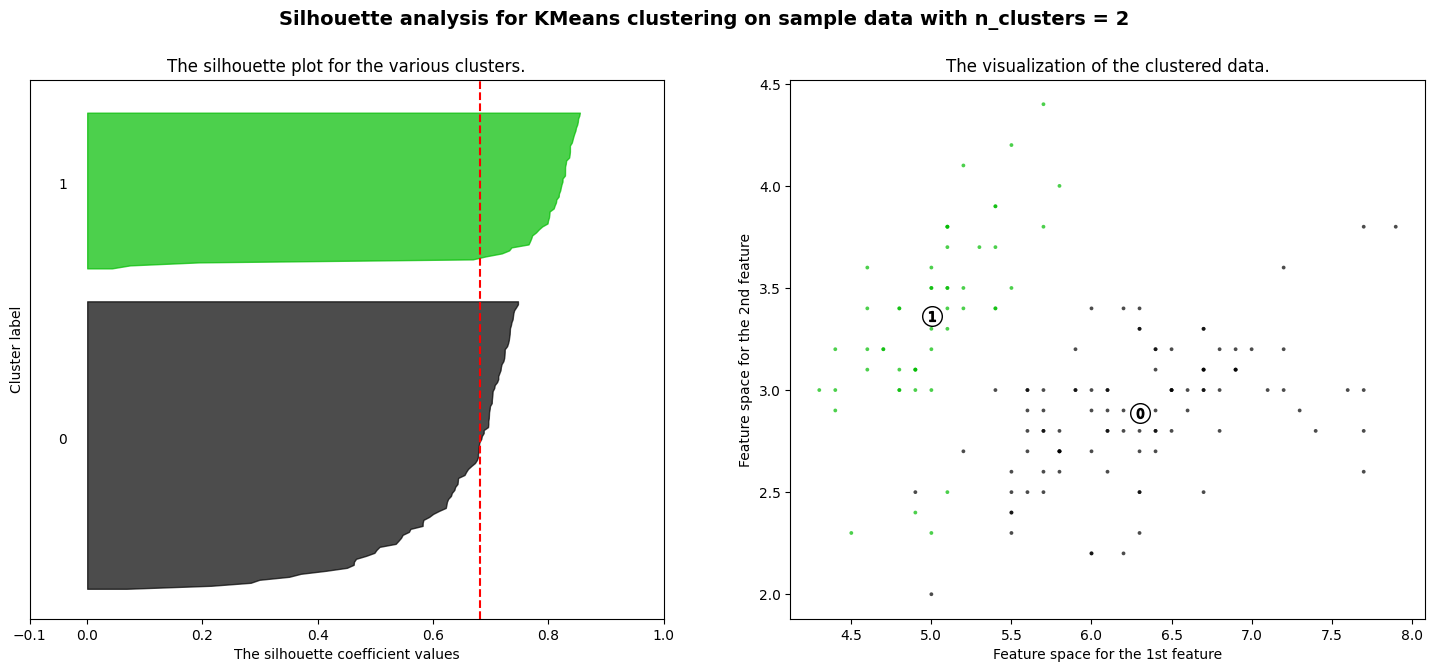

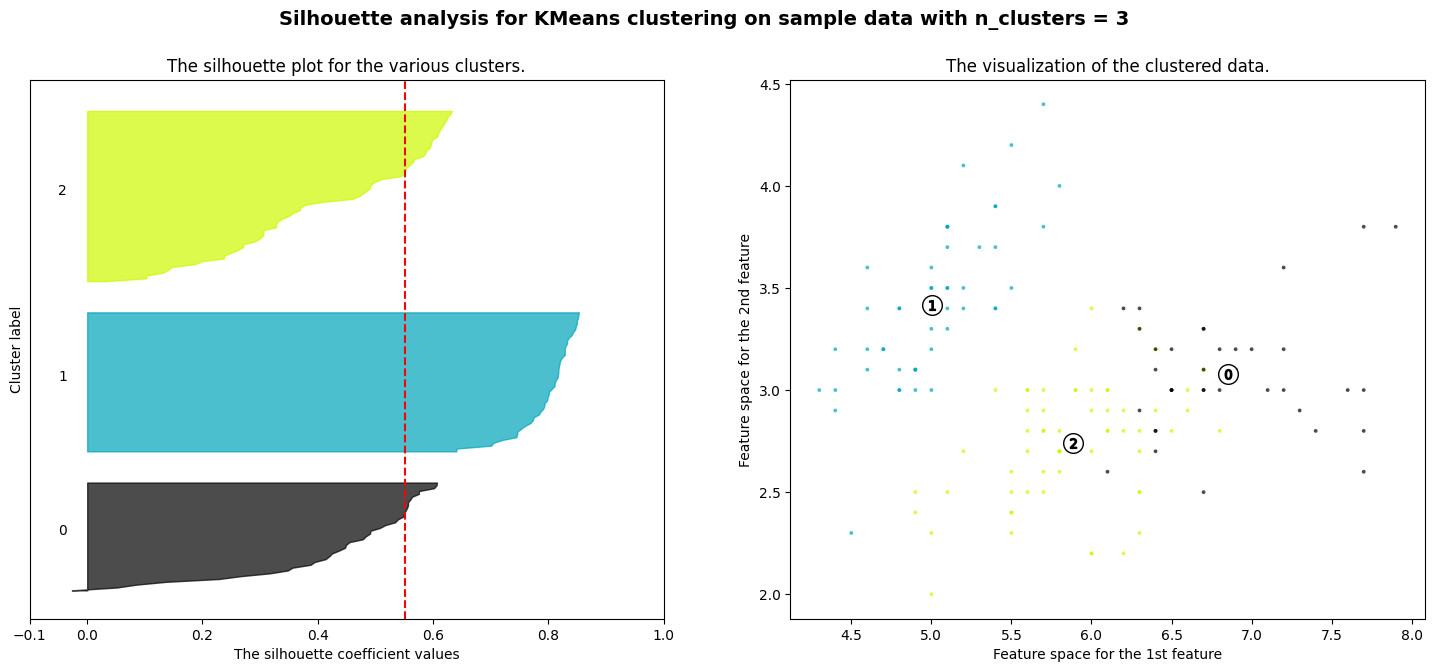

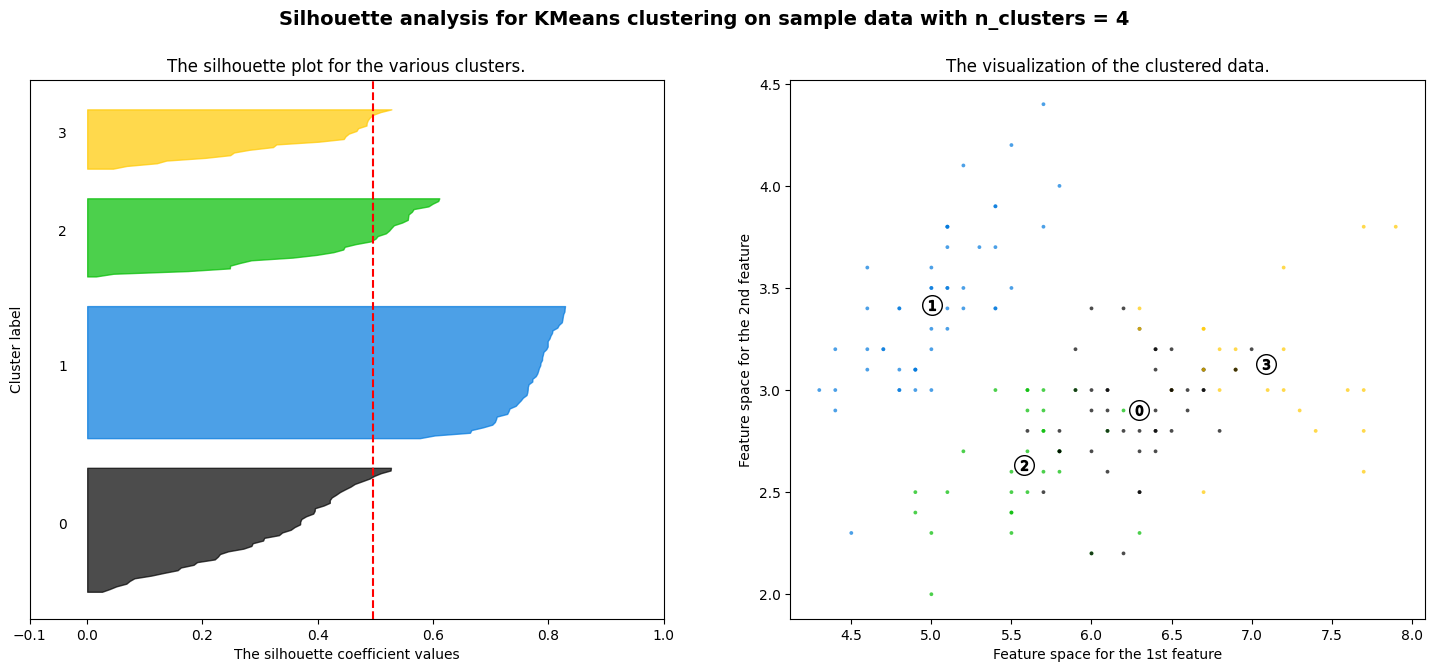

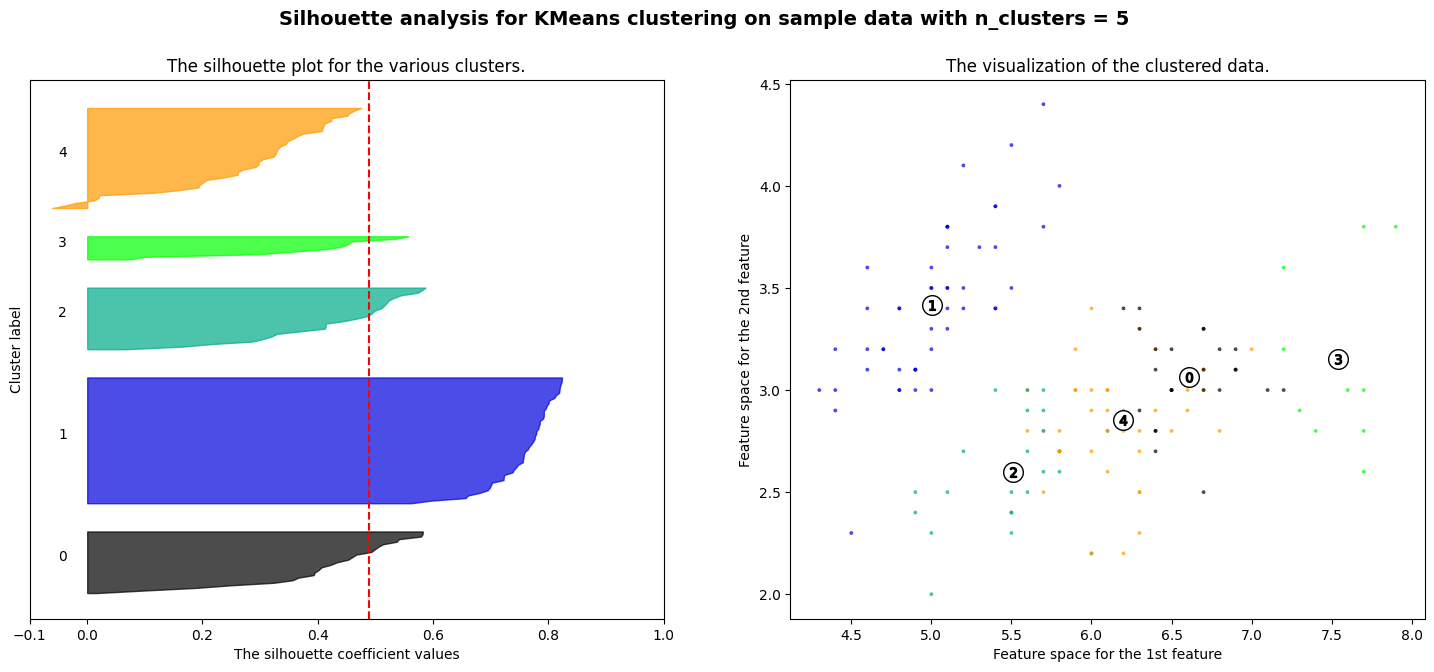

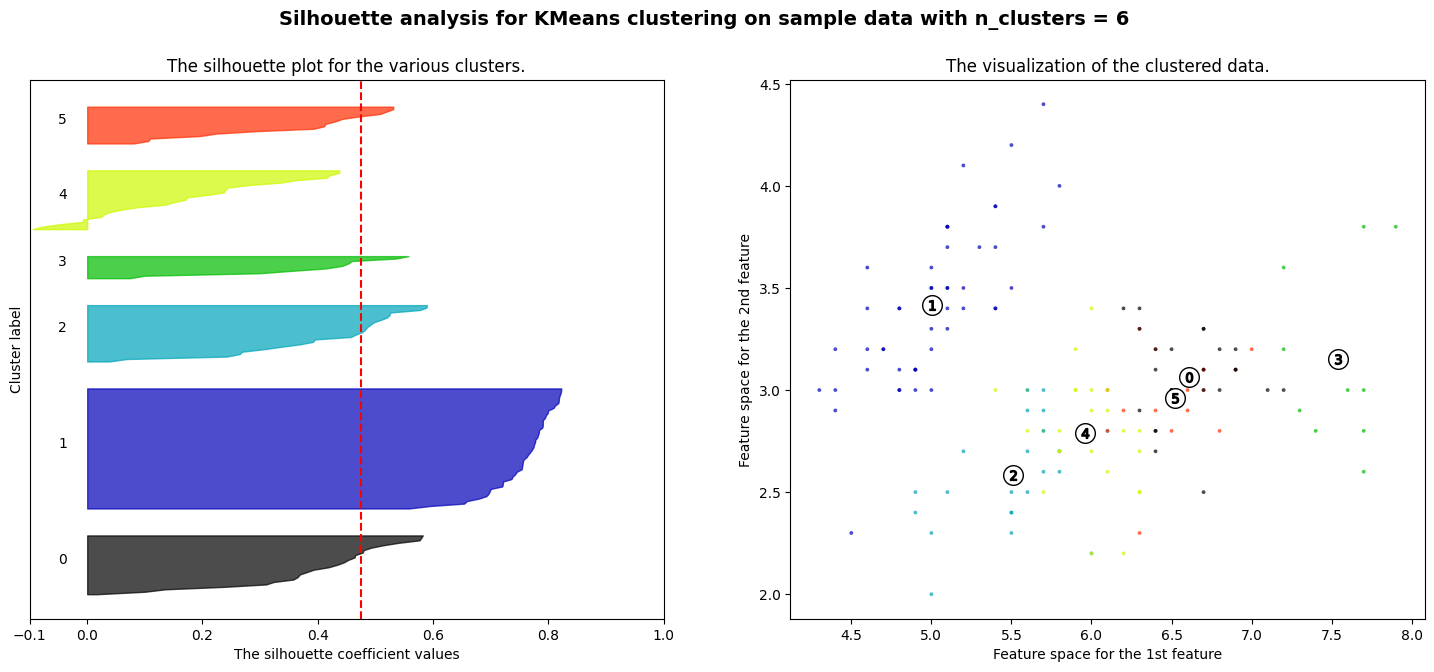

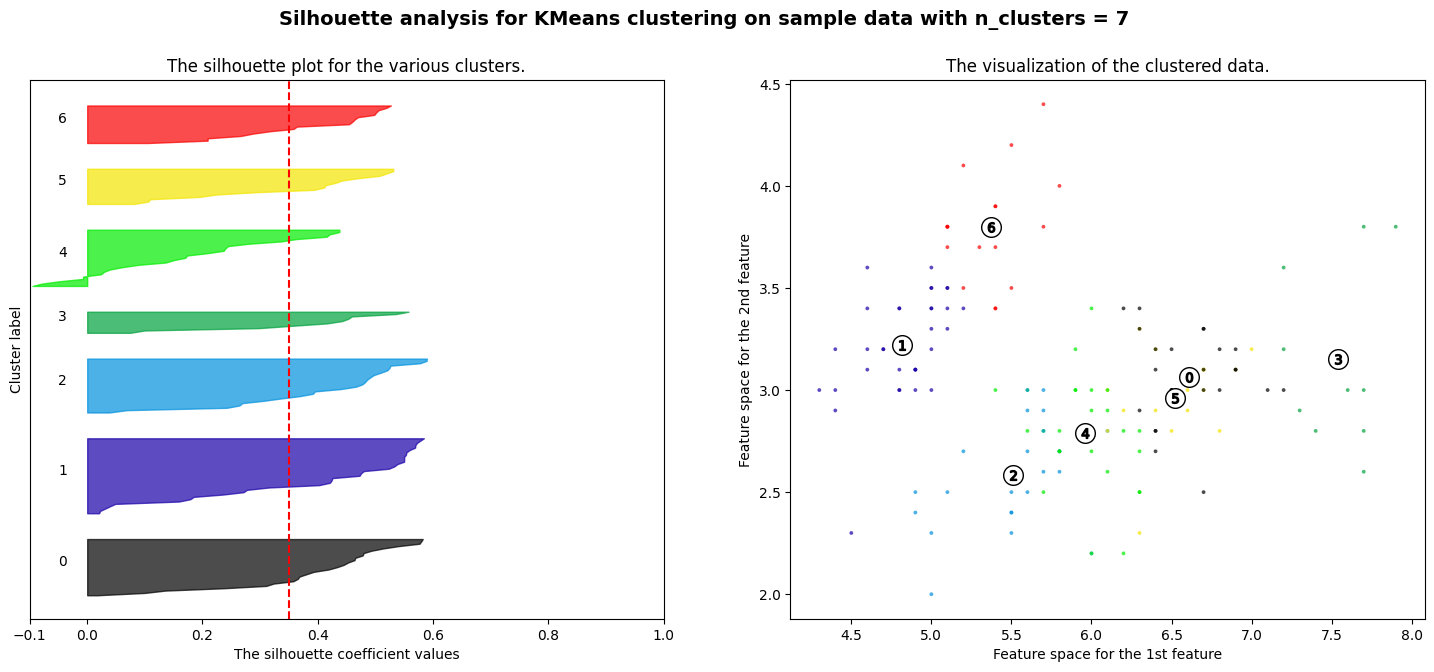

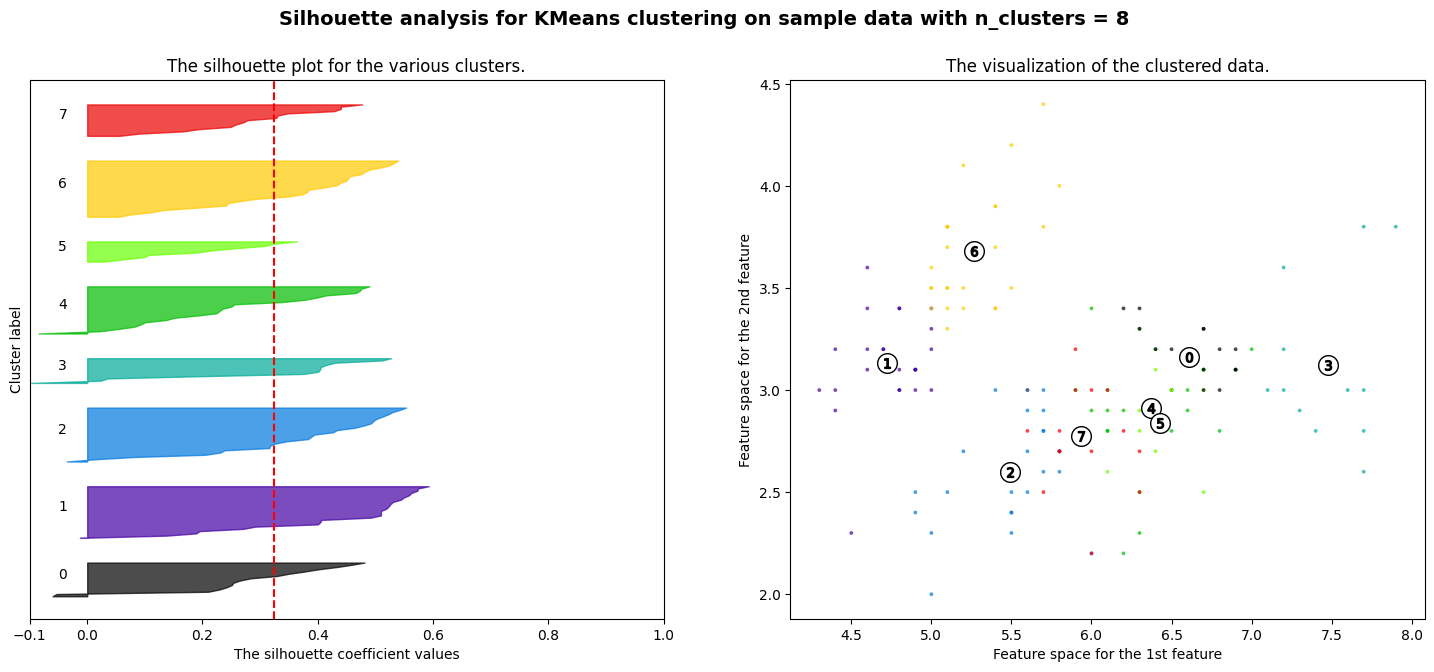

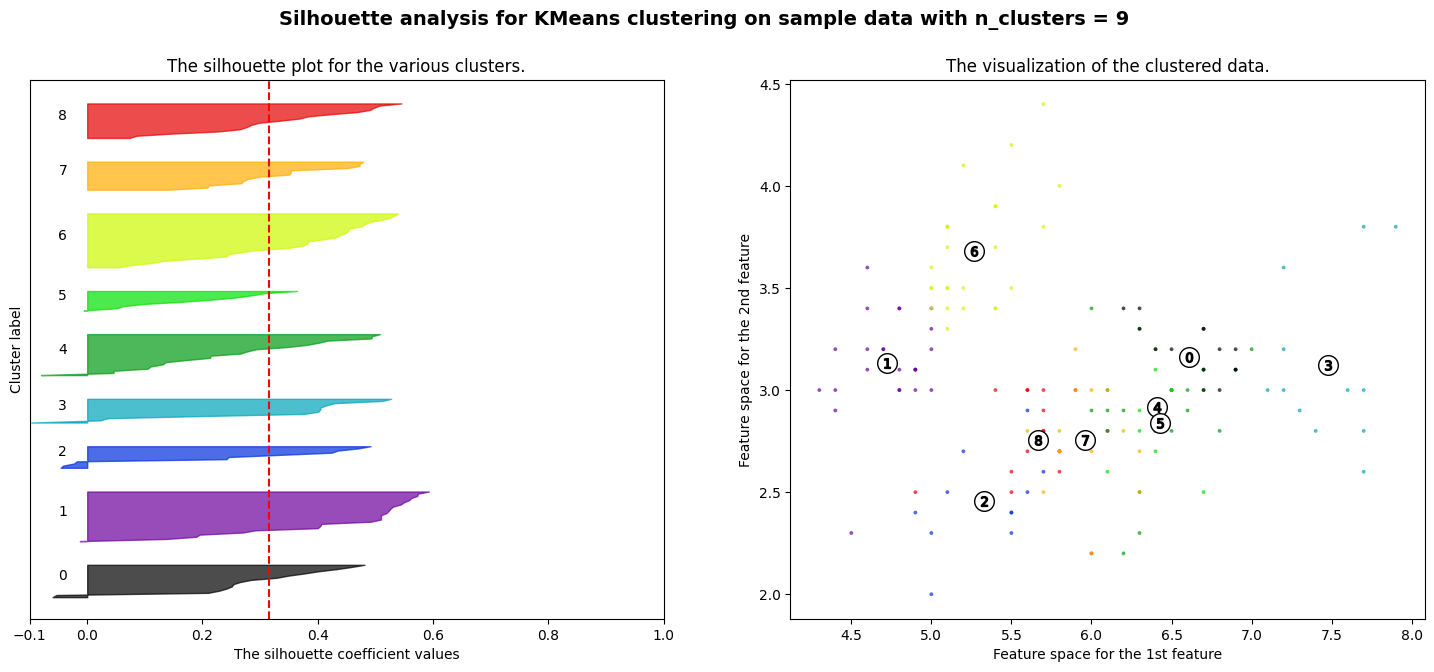

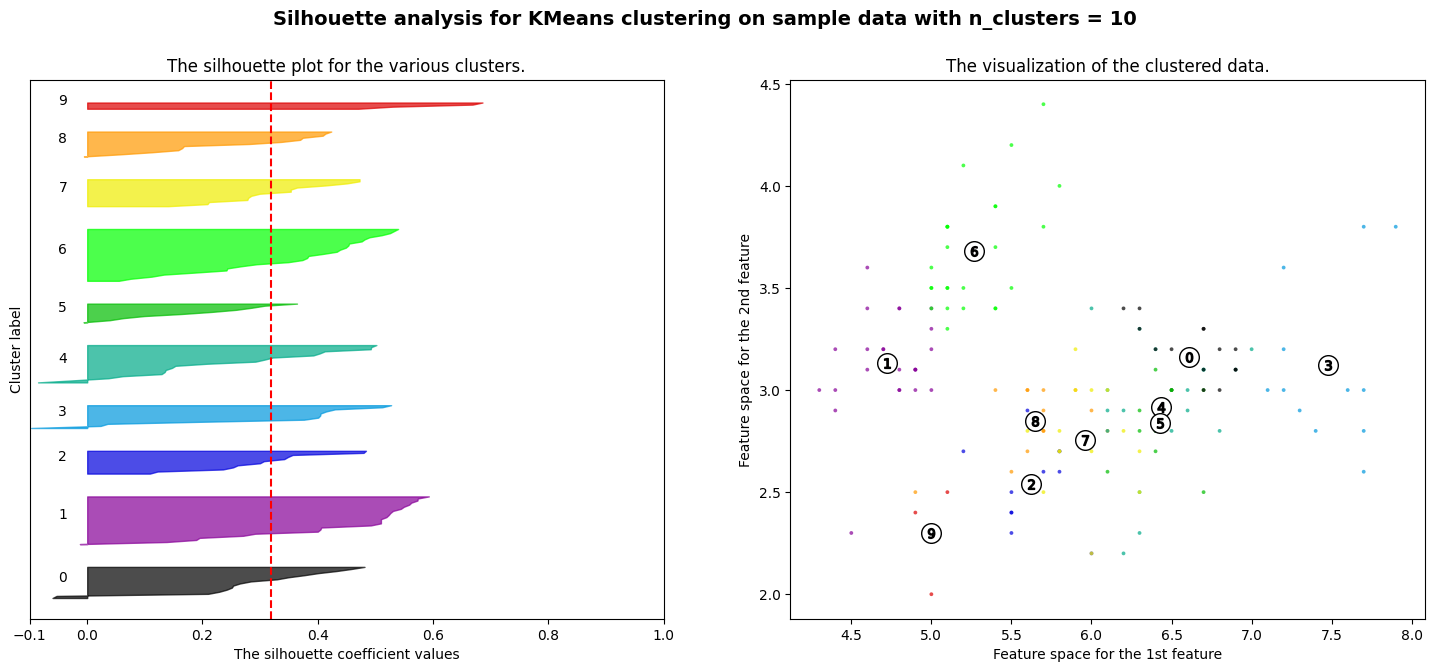

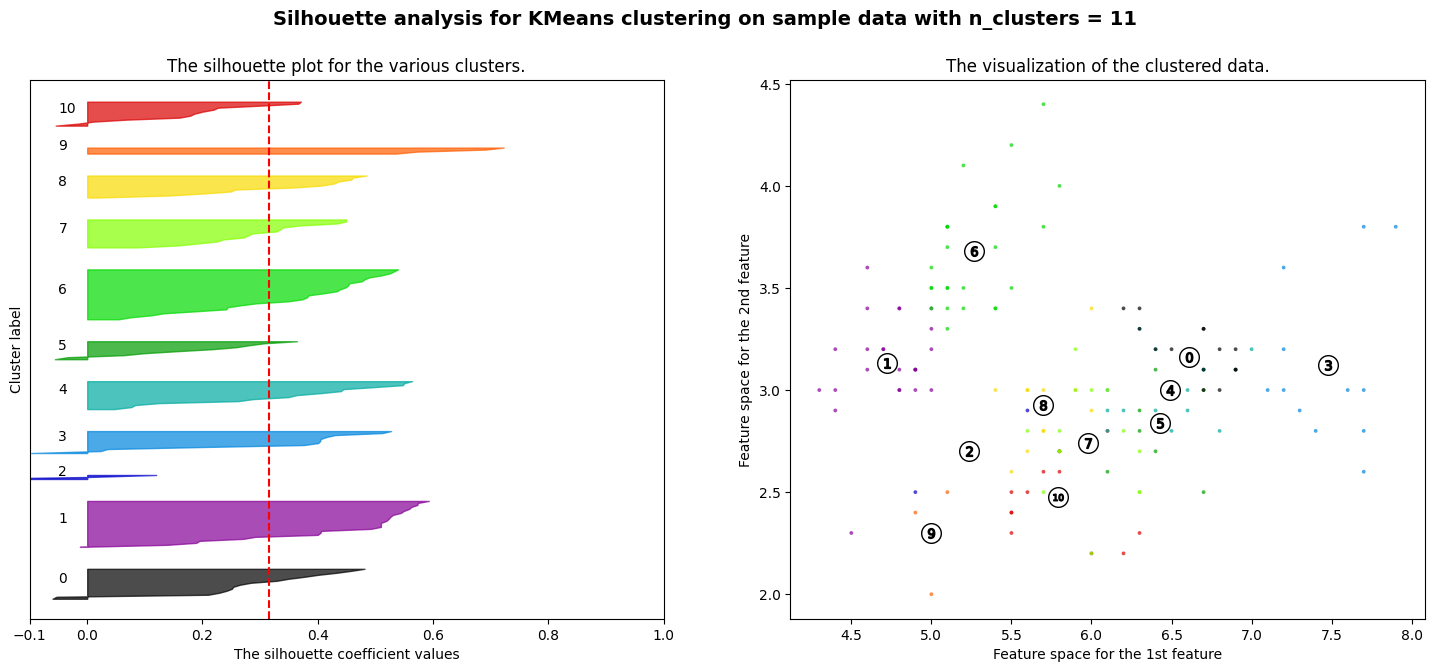

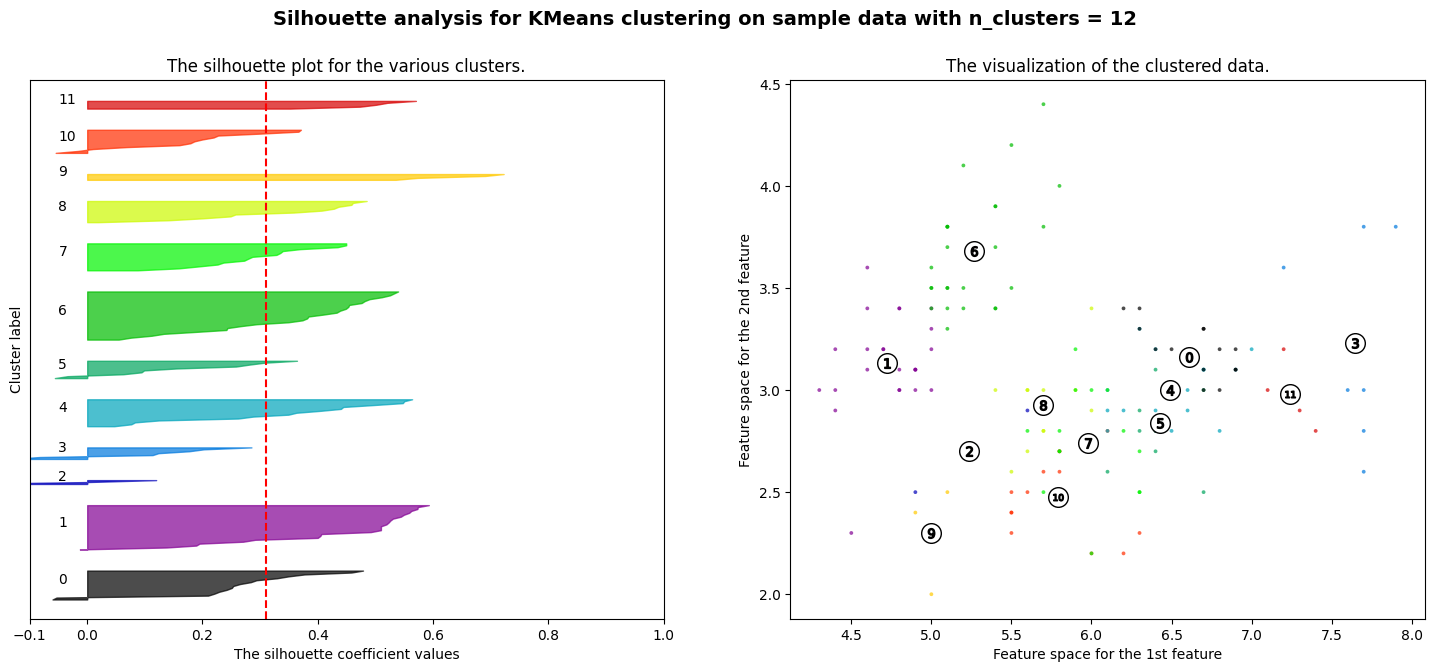

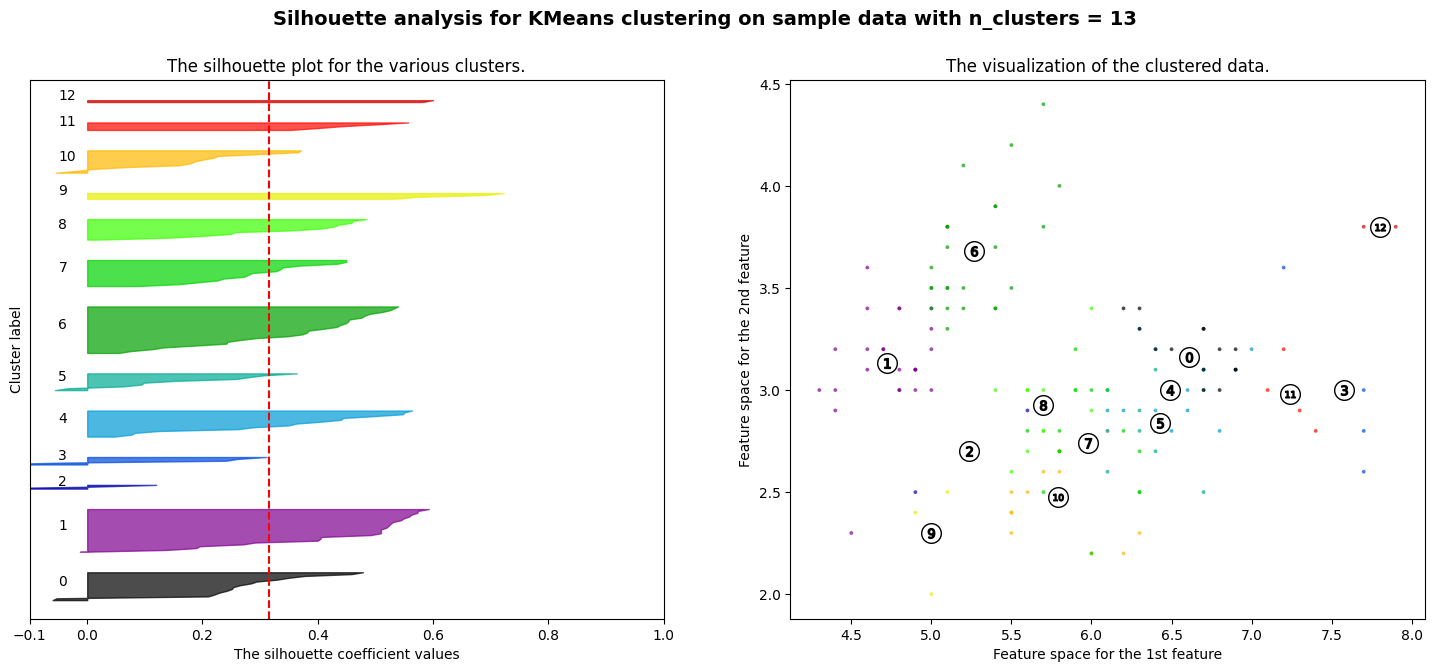

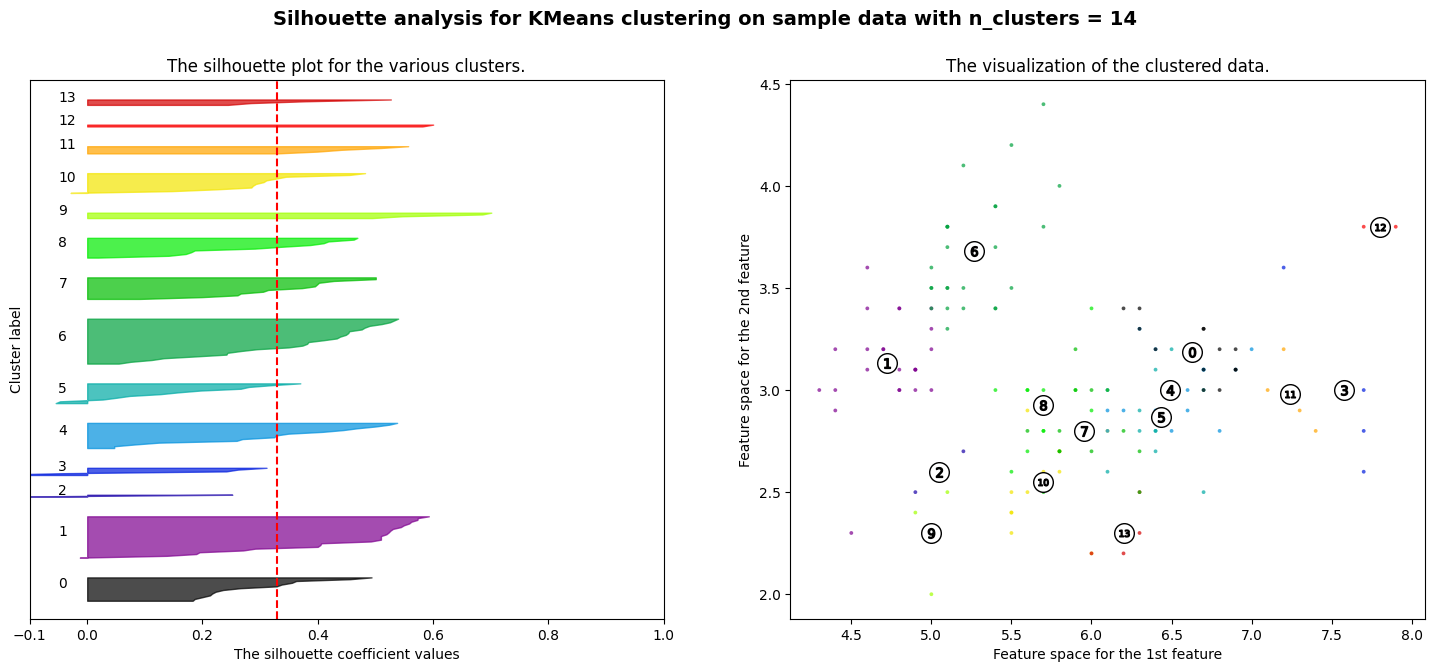

In [ ]:
dibuja_siluetas(15,irisValues)

***
**Pregunta**

Teniendo en cuenta los gráficos anteriores y valores de silueta. ¿Qué número de clústeres consideras adecuado para este dataset?

**Respuesta**

***


Coeficiente de silueta promedio: 0.551191604619592


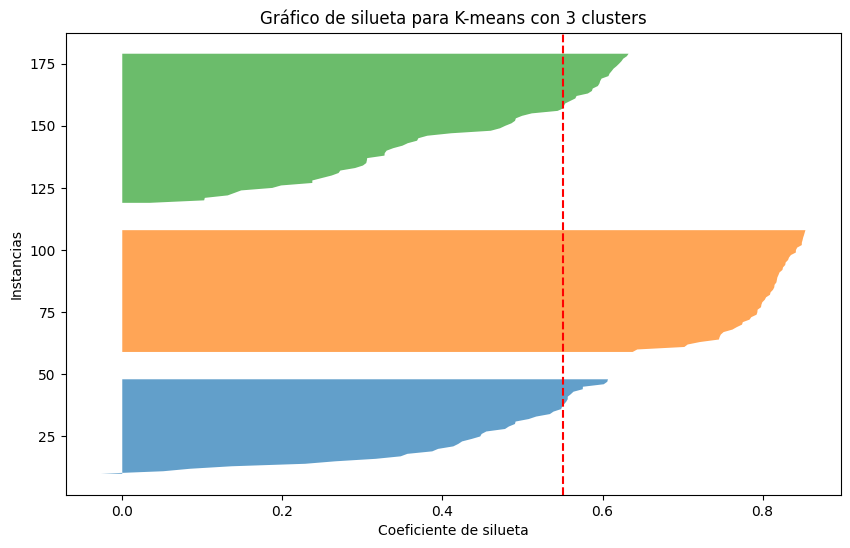

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

# Cargar el dataset Iris
iris = load_iris()
data = iris.data

# Probar con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_

# Calcular coeficiente de silueta promedio
silhouette_avg = silhouette_score(data, labels)
print(f"Coeficiente de silueta promedio: {silhouette_avg}")

# Generar gráfico de silueta
sample_silhouette_values = silhouette_samples(data, labels)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(3):  # Número de clusters
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Gráfico de silueta para K-means con 3 clusters")
plt.xlabel("Coeficiente de silueta")
plt.ylabel("Instancias")
plt.show()


La siguiente función toma tres argumentos: el resultado devuelto al llamar al atributo labels_ de un objeto KMeans, el dataset original (en nuestro caso df) y una clase (en nuestro ejemplo puede ser Iris-setosa, Iris-versicolor o Iris-virginica); y devuelva una lista con el número de instancias de esa clase para cada clúster.

In [4]:
import numpy as np

def valida_iris(labels,dataset,clase):
    values = dataset.values
    res = np.zeros(3).astype("uint8")
    for i,instance in enumerate(values):
        if(instance[4]==clase):
            res[labels[i]]+=1
    return res

***
**Pregunta**

¿Qué resultados se obtienen para cada clase? A continuación se muestra el comando para la clase Iris-setosa. Proporciona en las celdas disponibles las llamadas a la función con las clases que quedan.


In [2]:
valida_iris(estimatorKmeans.labels_,df,'Iris-setosa')

NameError: name 'estimatorKmeans' is not defined

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Cargar el dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Entrenar el modelo K-Means
estimatorKmeans = KMeans(n_clusters=3, random_state=42)
estimatorKmeans.fit(df[iris.feature_names])  # Entrenamos con las características

# Definir la función valida_iris
def valida_iris(labels, dataset, clase):
    values = dataset.values
    res = np.zeros(3).astype("uint8")  # Suponemos 3 clusters
    for i, instance in enumerate(values):
        if instance[4] == clase:  # Revisar si pertenece a la clase
            res[labels[i]] += 1
    return res

# Analizar los resultados para cada clase
for clase in [0, 1, 2]:  # Las clases Iris-setosa, Iris-versicolor, Iris-virginica
    clase_name = iris.target_names[clase]
    resultados = valida_iris(estimatorKmeans.labels_, df, clase)
    print(f"Resultados para la clase {clase_name}: {resultados}")


Resultados para la clase setosa: [ 0 50  0]
Resultados para la clase versicolor: [ 3  0 47]
Resultados para la clase virginica: [36  0 14]



***

## Mean shift

Veámos ahora como utilizar el algoritmo de [Mean Shift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift). De nuevo, lo primero es cargar dicha funcionalidad.

In [10]:
from sklearn.cluster import MeanShift

A continuación creamos un estimador usando dicha funcionalidad, y a continuación calculamos los clusters.

In [9]:
estimatorMeanShift = MeanShift()
estimatorMeanShift.fit(irisValues)

NameError: name 'irisValues' is not defined

In [13]:
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el dataset Iris
iris = load_iris()
irisValues = iris.data  # Las características del dataset (sepal y petal, longitudes y anchos)


Veremos que esto nos devuelve la instancia de la clase MeanShift, para acceder a dicha información tenemos que usar el atributo labels_.

In [12]:
estimatorMeanShift.labels_

AttributeError: 'MeanShift' object has no attribute 'labels_'

***
**Pregunta**

¿Cuántos clusters sugiere el método de Mean Shift para el dataset de iris?

**Respuesta**

***

In [14]:
import numpy as np

# Calcular el número de clusters únicos
num_clusters = len(np.unique(estimatorMeanShift.labels_))
print(f"El número de clusters sugeridos por Mean Shift es: {num_clusters}")


AttributeError: 'MeanShift' object has no attribute 'labels_'

In [15]:
from sklearn.cluster import MeanShift
from sklearn.datasets import load_iris
import numpy as np

# Cargar el dataset Iris
iris = load_iris()
irisValues = iris.data  # Las características del dataset (longitudes y anchos)

# Crear y entrenar el modelo MeanShift
estimatorMeanShift = MeanShift()
estimatorMeanShift.fit(irisValues)


MeanShift()

In [16]:
# Calcular el número de clusters únicos
num_clusters = len(np.unique(estimatorMeanShift.labels_))
print(f"El número de clusters sugeridos por Mean Shift es: {num_clusters}")


El número de clusters sugeridos por Mean Shift es: 2


***
**Pregunta**

Utilizando la función valida_iris, ¿qué resultados se obtienen para cada clase utilizando Mean Shift?

In [17]:
from sklearn.cluster import MeanShift
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Cargar el dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Agregar las etiquetas verdaderas (0: Setosa, 1: Versicolor, 2: Virginica)

# Entrenar el modelo Mean Shift
estimatorMeanShift = MeanShift()
estimatorMeanShift.fit(df[iris.feature_names])  # Entrenamos con las características

# Función valida_iris
def valida_iris(labels, dataset, clase):
    values = dataset.values
    res = np.zeros(len(np.unique(labels))).astype("uint8")  # Adaptar a la cantidad de clusters
    for i, instance in enumerate(values):
        if instance[4] == clase:  # Verifica si pertenece a la clase actual
            res[labels[i]] += 1
    return res

# Analizar los resultados para cada clase
clases = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for clase_id, clase_name in enumerate(clases):
    resultados = valida_iris(estimatorMeanShift.labels_, df, clase_id)
    print(f"Resultados para la clase {clase_name}: {resultados}")


Resultados para la clase Iris-setosa: [ 0 50]
Resultados para la clase Iris-versicolor: [49  1]
Resultados para la clase Iris-virginica: [50  0]


***

## DBSCAN

Repetimos lo mismo para el algoritmo de clustering [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN).

***
**Pregunta**

¿Qué hace cada una de las siguientes instrucciones?

In [18]:
from sklearn.cluster import DBSCAN

estimatorDBSCAN = DBSCAN()
estimatorDBSCAN.fit(irisValues)
estimatorDBSCAN.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

**Respuesta**
***

1. Importa el modelo DBSCAN.
2. Inicializa un modelo DBSCAN con los parámetros predeterminados.
3. Ajusta el modelo a los datos `irisValues`.
4. Devuelve las etiquetas de los clusters formados (o ruido) para cada punto en el dataset.

***
**Pregunta**

Consulta la documentación de DBSCAN y responde a las siguientes preguntas. ¿Qué valores toma por defecto DBSCAN para los parámetros epsilon y min_samples? ¿Qué otros parámetros tiene este algoritmo de clustering en sklearn?

**Respuesta**

***

- eps=0.5: Es el radio máximo que define la vecindad de un punto. Es decir, puntos dentro de esta distancia son considerados vecinos.
   - min_samples=5: Es el número mínimo de puntos que deben estar dentro de la vecindad (incluyendo el punto mismo) para que sea considerado un "core point" y forme parte de un cluster.
Otros parámetros
- metric='euclidean: Define la métrica de distancia utilizada (por defecto, la distancia euclidiana).
   - algorithm='auto: El algoritmo para calcular vecinos cercanos.   - **`leaf_size=30`**: Tamaño de los nodos hoja en los algoritmos "BallTree" y "KDTree". Afecta la velocidad de consulta y uso de memoria.
   - p=2: Parámetro del cálculo de distancia de Minkowski (si `metric='minkowski'`).
   - n_jobs=None: Número de trabajos paralelos.


***
**Pregunta**

¿Cuántos clústeres sugiere el método de DBSCAN para el dataset de iris?

**Respuesta**

***

Con los valores por defecto (`eps=0.5`, `min_samples=5`), DBSCAN generalmente sugiere 2 clusters para el dataset Iris.


***
**Pregunta**

Utilizando la función valida_iris, ¿qué resultados se obtienen para cada clase utilizando DBSCAN?


In [19]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Cargar el dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Agregar las etiquetas verdaderas (0: Setosa, 1: Versicolor, 2: Virginica)

# Entrenar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df[iris.feature_names])  # Entrenamos con las características

# Función valida_iris (adaptada para DBSCAN)
def valida_iris(labels, dataset, clase):
    values = dataset.values
    res = np.zeros(len(np.unique(labels))).astype("uint8")  # Adaptar a la cantidad de clusters y ruido (-1)
    for i, instance in enumerate(values):
        if instance[4] == clase:  # Verifica si pertenece a la clase actual
            res[labels[i]] += 1
    return res

# Analizar los resultados para cada clase
clases = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for clase_id, clase_name in enumerate(clases):
    resultados = valida_iris(dbscan.labels_, df, clase_id)
    print(f"Resultados para la clase {clase_name}: {resultados}")


Resultados para la clase Iris-setosa: [49  0  1]
Resultados para la clase Iris-versicolor: [ 0 44  6]
Resultados para la clase Iris-virginica: [ 0 40 10]


***

Guarda el fichero con la opción *Save a Copy in GitHub...* del menú *File*.